## **UNAD** 
## **Tarea 3** - **Analisis de datos.**
## **Algoritmos de Aprendizaje Supervisado.**
## Grupo Colaborativo 202016908A_1704. 

**Regresión Lineal Dataset Carros.**

## Pasos de la Actividad:
1. Realizar un análisis exploratorio de los datos para identificar
relaciones entre variables, valores atípicos, tendencias, etc.
2. Preprocesar los datos limpiándolos, tratando valores faltantes y
transformándolos según sea necesario.
3. Seleccionar las características más relevantes para entrenar el 
modelo utilizando selección de características.
4. Dividir el dataset en Train y Test para evaluar correctamente el modelo.
5. Entrenar el modelo configurando los diferentes hiperparámetros.
6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc.
7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.
8. Interpretar, analizar y documentar los resultados obtenidos.
9.  Crear una cuenta en GitHub y cargar los códigos de los modelos
diseñados https://github.com/

# 1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.

In [124]:
#Cargue de librerias.  

import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, confusion_matrix

In [136]:
Datos_Carros = pd.read_csv('C:/Users/sopor/OneDrive - Universidad Nacional Abierta y a Distancia/ANALISIS DE DATOS/Entrega 3/Dataset/Carros.csv', encoding='latin1')

In [140]:
Datos_Carros.head(303)

,Marca,Año,Precio_Venta,Precio_Actual,Kilometraje,Tipo_Combustible,Tipo_Vendedor,Transmision,Dueño
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


Text(0.5, 1.0, 'Identificación de los Datos Faltantes y Atipicos Para Datos_Carros.')

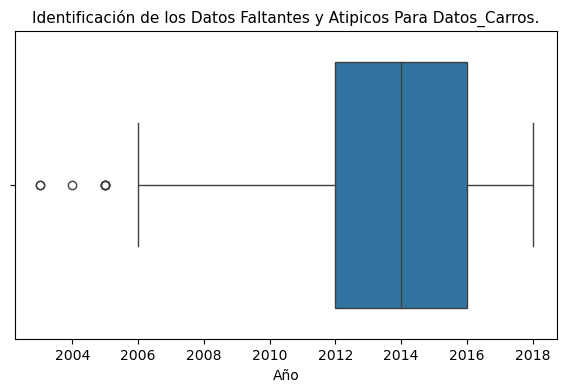

In [142]:
#Datos Faltantes y Atipicos Datos Enfermedades Cardiacas. 
plt.figure(figsize=(7, 4))
sns.boxplot(x=Datos_Carros['Año'])
plt.title('Identificación de los Datos Faltantes y Atipicos Para Datos_Carros.', fontsize=11)

In [146]:
#Revision de Datos Faltantes. 

print("Numero de Registros con cero en Marca del Carro: ", Datos_Carros['Marca'].isin([0]).sum())
print("Numero de Registros con cero en Año: ", Datos_Carros['Año'].isin([0]).sum())
print("Numero de Registros con cero en Precio Venta: ", Datos_Carros['Precio_Venta'].isin([0]).sum())
print("Numero de Registros con cero en Precio Actual: ", Datos_Carros['Precio_Actual'].isin([0]).sum())
print("Numero de Registros con cero en Kilometraje: ", Datos_Carros['Kilometraje'].isin([0]).sum())
print("Numero de Registros con cero en Tipo de Kilometraje: ", Datos_Carros['Tipo_Combustible'].isin([0]).sum())
print("Numero de Registros con cero en Tipo de Vendedor: ", Datos_Carros['Tipo_Vendedor'].isin([0]).sum())
print("Numero de Registros con cero en Transmision: ", Datos_Carros['Transmision'].isin([0]).sum())
print("Numero de Registros con cero en Dueño: ", Datos_Carros['Dueño'].isin([0]).sum())

Numero de Registros con cero en Marca del Carro:  0
Numero de Registros con cero en Año:  0
Numero de Registros con cero en Precio Venta:  0
Numero de Registros con cero en Precio Actual:  0
Numero de Registros con cero en Kilometraje:  0
Numero de Registros con cero en Tipo de Kilometraje:  0
Numero de Registros con cero en Tipo de Vendedor:  0
Numero de Registros con cero en Transmision:  0
Numero de Registros con cero en Dueño:  290


Text(0.5, 1.0, 'Identificación de Datos Atipicos.')

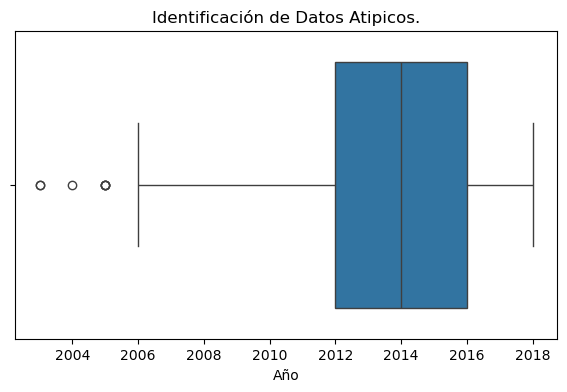

In [148]:
#Datos Atipicos.  
plt.figure(figsize=(7,4))
sns.boxplot(x=Datos_Carros['Año'])
plt.title('Identificación de Datos Atipicos.',fontsize=12)

In [150]:
Datos_Carros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Marca             301 non-null    object 
 1   Año               301 non-null    int64  
 2   Precio_Venta      301 non-null    float64
 3   Precio_Actual     301 non-null    float64
 4   Kilometraje       301 non-null    int64  
 5   Tipo_Combustible  301 non-null    object 
 6   Tipo_Vendedor     301 non-null    object 
 7   Transmision       301 non-null    object 
 8   Dueño             301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


# 3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características.

Caracteristicas de Interes: 
* Modelos de los Carros (Año).
* Dueños de los carros.

**Modelos de los Carros(Año).**

In [154]:
Datos_Carros['Año'].value_counts()

Año
2015    61
2016    50
2014    38
2017    35
2013    33
2012    23
2011    19
2010    15
2008     7
2009     6
2006     4
2005     4
2003     2
2007     2
2018     1
2004     1
Name: count, dtype: int64

In [156]:
Datos_Carros[['Dueño']].head(303)

,Dueño
0,0
1,0
2,0
3,0
4,0
...,...
296,0
297,0
298,0
299,0


# 4. Dividir el dataset en Train y Test para evaluar correctamente el modelo.  

In [227]:
# Train (75%) - Test (25%).  
X = Datos_Carros.drop('Tipo_Vendedor',axis=1)
Y = Datos_Carros['Tipo_Vendedor']

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.25, stratify=Y,random_state=0)

X_train = pd.get_dummies(X_train, drop_first=True)
Y_train = pd.get_dummies(Y_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

In [197]:
print(X_train)

      Año  Precio_Venta  Precio_Actual  Kilometraje  Dueño  Marca_Activa 4g  \
154  2014          0.50          0.880         8000      0            False   
287  2015          5.75          7.500        44000      0            False   
249  2016          5.25          7.600        17000      0            False   
193  2013          0.20          0.650        24000      1            False   
198  2011          0.15          0.570        35000      1            False   
..    ...           ...            ...          ...    ...              ...   
73   2011          2.65          5.710        43000      0            False   
126  2017          0.90          0.950         1300      0            False   
281  2006          2.10          7.600        50456      0            False   
14   2009          2.25          7.210        77427      0            False   
194  2008          0.20          0.787        50000      0            False   

     Marca_Bajaj  ct 100  Marca_Bajaj Avenger 150 s

In [199]:
print(Y_train)

     Individual
154        True
287       False
249       False
193        True
198        True
..          ...
73        False
126        True
281       False
14        False
194        True

[225 rows x 1 columns]


In [201]:
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# 5. Entrenar el modelo configurando los diferentes hiperparámetros. 

In [203]:
#Construcción del modelo de Regresión Lineal.
modelo_regresion_lineal = LinearRegression()
modelo_regresion_lineal.fit (X_train , Y_train)

#Creación de modelo de predicción.  
Prediccion = modelo_regresion_lineal.predict(X_test)
Prediccion_clases = [1 if prob >= 0.5 else 0 for prob in Prediccion]

In [205]:
print(Y_test)

171    Individual
118    Individual
221        Dealer
83         Dealer
148    Individual
          ...    
239        Dealer
164    Individual
62         Dealer
179    Individual
71         Dealer
Name: Tipo_Vendedor, Length: 76, dtype: object


In [210]:
print(Prediccion_clases)

[1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0]


## 6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como presición, recall, F1-score, etc.

In [223]:
from sklearn.metrics import classification_report

Etiquetas = {0:'Individual',1:'Dealer'}
Prediccion_clases_texto = [Etiquetas[pred] for pred in Prediccion_clases]

print(classification_report(Y_test,Prediccion_clases_texto))

              precision    recall  f1-score   support

      Dealer       0.14      0.08      0.10        49
  Individual       0.04      0.07      0.05        27

    accuracy                           0.08        76
   macro avg       0.09      0.08      0.08        76
weighted avg       0.10      0.08      0.09        76



## 7. Realizar las diferentes graficas que permitan visualizar los resultados del modelo.  

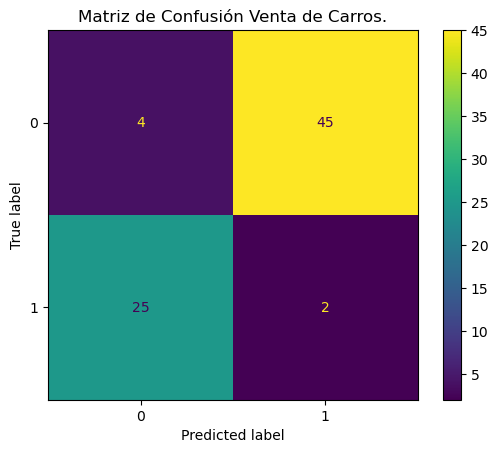

In [234]:
from sklearn import metrics

cm=confusion_matrix(Y_test,Prediccion_clases_texto)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Matriz de Confusión Venta de Carros.')
plt.show()

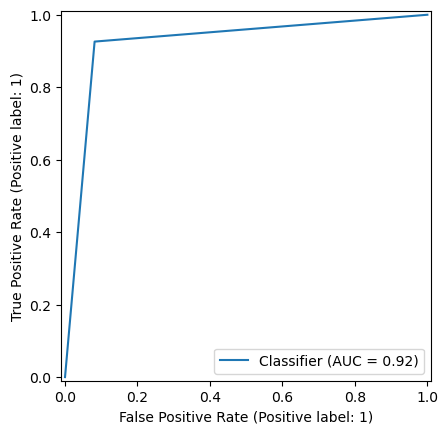

In [242]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt

# Crear el codificador y ajustarlo a Y_test
le = LabelEncoder()
Y_test_encoded = le.fit_transform(Y_test)  # Esto convertirá 'Dealer' a 1 y 'Individual' a 0

# Crear la curva ROC
RocCurveDisplay.from_predictions(Y_test_encoded, Prediccion_clases)
plt.show()

## 8. Interpretar, analizar y documentar los resultados obtenidos. 

En cuanto al desempeño del modelo se puedes afirmar lo siguiente:

* Presición: El 14% o 0.14 como se muestra en el modelo de desempeño, conforma que solo este porcentaje de ventas realizadas por un vendedor propio del concesionario.
* Recall: En el modelo de desempeño indica que el modelo identico corresponde a un 0.07 o 7% de las ventas son con el dueño directamente.
* F1-score: Dentro de este item, la puntuacion de la venta de carros es de 0.10 o 10%, indicando un balance entre precision y recall.

Matriz de Confusión:
El modelo tiene un rendimiento bastante sólido, pero hay margen de mejora, especialmente en la exhaustividad, ya que el 30% de los casos positivos reales no se están detectando. Podrías considerar ajustar el umbral de clasificación o explorar técnicas adicionales para mejorar el recall

Curva de Presición: Para la curva de presición en AUC corresponde a un 0.92 o 92% de los datos suministrados son datos correctos. 